In [1]:

import numpy as np
from cvxpy import *

import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

# Linear Program

In [4]:
# # p = Parameter(sign="positive", value=4)
# p = 4
# u = np.array([0.3, 0.25, 0.45])
# t = np.array([5.0,6.0,2.0]) #.reshape((i,1))
# # k = Parameter(sign="positive", value=3)
# k = 3
# # T = Parameter(sign="positive", value=10)
# T = 10

def lp_assign_slots(num_slots, utilities, throughputs, required_throughput):
    p = num_slots
#     print p
    k = len(utilities)
#     print k
    assert len(throughputs) == len(utilities)
    T = required_throughput #*1.1
    X = Variable(k,p)
    r = Variable(k)
    q = Variable(k)
    maxs = []
    constr = [] 
    constr += [X >= 0, X <= 1]
    for i in range(k):
        constr += [q[i] == sum_entries(X[i,:])*t[i]/T - r[i]]
        maxs.append(Maximize(q[i]*u[i] - r[i]))

    for j in range(p): 
        constr += [sum_entries(X[:,j]) == 1]
   
    
    constr += [sum_entries(X) == p]
    constr += [q >= 0, q <= 1, r >= 0]
    
    
    ###########################
    # Cross-term penalty is not convex
    ############################
#     for i in range(k):
#         for l in range(k):
#             if i != l:
#                 maxs.append(Maximize(-1*X[i,j]*X[l,j]))
            
    prob = Problem(sum(maxs), constr)


#     print(prob.solve(solver=ECOS_BB, mi_max_iters=10000))
    print(prob.solve())

    xs = np.zeros((k,p))
#     print X.value
    for i in range(k):
        for j in range(p):
            cur_x = X.value[i,j]
            if cur_x > 0.01:
                xs[i,j] = cur_x
    return (xs,prob,q,r)
#     return X.value


In [3]:
print r.value
print q.value

NameError: name 'r' is not defined

# Integer Program

In [5]:
p = 4
u = np.array([0.3, 0.25, 0.45])
t = np.array([5.0,6.0,2.0]) #.reshape((i,1))
# k = Parameter(sign="positive", value=3)
k = 3
# T = Parameter(sign="positive", value=10)
T = 10

X = Int(k,p)
r = Variable(k)
q = Int(k)

maxs = []
constraints = []
for i in range(k):
#     obj = q[i]*u[i] - r[i]
#     constr = [q[i] == sum_entries(X[i,:])*t[i]/T - r[i]]
    maxs.append(Maximize(q[i]*u[i] - r[i]))
    constraints += [q[i] == sum_entries(X[i,:]) - r[i]]
    constraints += [sum_entries(X[i,:])*t[i] >= T*q[i]]



for j in range(p): 
    # should this be equality or lt_equals?
    constraints += [sum_entries(X[:,j]) == 1]
    

    
constraints += [sum_entries(X) == p]
constraints += [X <= 1]
constraints += [X >= 0]
constraints += [q <= 1]
constraints += [q >= 0]
constraints += [r >= 0]
prob = Problem(sum(maxs), constraints)


# print [c.is_dcp() for c in full_prob.constraints]

prob.solve()
xs = np.zeros((k,p))
for i in range(k):
    for j in range(p):
        cur_x = X.value[i,j]
        if cur_x > 0.0000001:
            xs[i,j] = cur_x
print xs
        
# res = [x if x > 0.0000001 else 0 for x in X.value]

[[ 0.  0.  1.  1.]
 [ 1.  1.  0.  0.]
 [ 0.  0.  0.  0.]]


In [6]:
import numpy as np
from cvxpy import *
def assign_slots(num_slots, utilities, throughputs, required_throughput):
# u = np.array([0.3, 0.25, 0.45])
# t = np.array([5.0,6.0,2.0]) #.reshape((i,1))
# # k = Parameter(sign="positive", value=3)
# k = 3
# # T = Parameter(sign="positive", value=10)
# T = 10)
    p = num_slots
    print p
    k = len(utilities)
    print k
    assert len(throughputs) == len(utilities)
    T = required_throughput
    X = Int(k,p)
    r = Variable(k)
    q = Int(k)
    maxs = []
    constraints = []
    for i in range(k):
        maxs.append(Maximize(q[i]*u[i] - r[i]))
        constraints += [q[i] == sum_entries(X[i,:]) - r[i]]
        constraints += [sum_entries(X[i,:])*t[i] >= T*q[i]]
    for j in range(p): 
        constraints += [sum_entries(X[:,j]) == 1]
    constraints += [sum_entries(X) == p]
    constraints += [X <= 1]
    constraints += [X >= 0]
    constraints += [q <= 1]
    constraints += [q >= 0]
    constraints += [r >= 0]
    prob = Problem(sum(maxs), constraints)
    print prob.solve()
#     print prob
    # filter small floats to 0
    xs = np.zeros((k,p))
    print X.value
    for i in range(k):
        for j in range(p):
            cur_x = X.value[i,j]
            if cur_x > 0.0000001:
                xs[i,j] = cur_x
    return xs

In [7]:
# import json
raw_vals = [0.8, 0.9, 1.3, 1.9, 0.15]
u = raw_vals / np.sum(raw_vals)
# print json.dumps(list(u))
t = [4000, 4700, 4600, 300, 4800]

p = 40
# u = np.array([0.3, 0.25, 0.45])
# t = np.array([5.0,6.0,2.0])
thrus = range(5000, 100000, 5000)
slot_allocations = np.zeros((len(t), len(thrus)))
for (idx, T) in enumerate(thrus):
    print T
# T = 20000*1.05
    slot_assignment, prob,q,r = lp_assign_slots(p,u,t,T)
    for i in range(len(slot_assignment)):
        slots_used = np.sum(slot_assignment[i])
        throughput_cap = slots_used*t[i]
        slot_allocations[i,idx] = slots_used
#         print slots_used, throughput_cap
    

5000
-0.133452821463
10000
0.974962447626
15000
0.824467398169
20000
0.749219873419
25000
0.704071358566
30000
0.673972348666
35000
0.652473055867
40000
0.636348586292
45000
0.623807332162
50000
0.611145895335
55000
0.600776858438
60000
0.585510909967
65000
0.553015352616
70000
0.525162017972
75000
0.501022461169
80000
0.479900348961
85000
0.461263191104
90000
0.4446968286
95000
0.428017309737


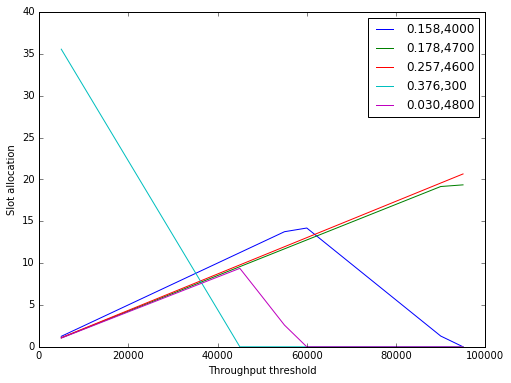

In [9]:
fig, ax = plt.subplots(figsize=(8,6))
for i in range(len(slot_allocations)):
    ax.plot(thrus, slot_allocations[i], label="%.3f,%d" % (u[i], t[i]))
ax.legend()
ax.set_xlabel("Throughput threshold")  
ax.set_ylabel("Slot allocation")
plt.show()

In [92]:
r.value

matrix([[  1.96357445e-13],
        [  7.60481723e-14],
        [ -7.80087704e-14],
        [  4.75991358e-13],
        [ -1.79277292e-13]])

In [100]:
print installed_solvers()

['CVXOPT', 'ECOS_BB', 'SCS', 'ECOS', 'LS']


In [107]:
1 != 3

True